In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Here are the step toward this problem explained in Appendix B [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow](http://https://www.amazon.in/Hands-Machine-Learning-Scikit-Learn-Tensor/dp/9352139054/ref=asc_df_9352139054/?tag=googleshopdes-21&linkCode=df0&hvadid=397006573861&hvpos=&hvnetw=g&hvrand=1830573946496308315&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1007789&hvtargid=pla-838380762468&psc=1&ext_vrnc=hi)
1. Frame the Problem and Look at the Big picture (Which is Done by Kaggle for us)
2. Get The data (Again Thanks to Kaggle & and those... who has actually callected it)
3. Explore the Data (This is the first step which we will actually do)
4. Prepare the Data (step 3 and 4 is the part of EDA)
5. Shortlist the Promising Models
6. Prepare and Present your solution.
7. Launch it

In [136]:
#train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [137]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000





# Exploratory Data Analysis

In [138]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [139]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [140]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Shrirang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


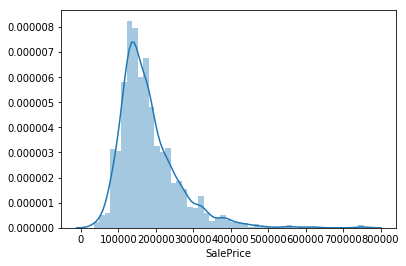

In [141]:
sns.distplot(train['SalePrice'])


C:\Users\Shrirang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


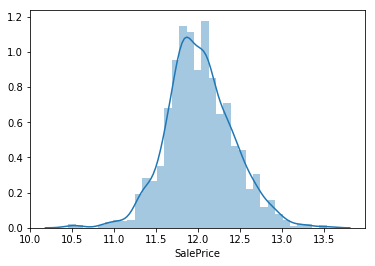

In [142]:
sns.distplot(np.log(train['SalePrice']))

As we see log function distribution of the sales price is nomale, Need to look into that

{'whiskers': [<matplotlib.lines.Line2D at 0x26f001a2978>,
 'caps': [<matplotlib.lines.Line2D at 0x26f001a2e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f001a2438>],
 'medians': [<matplotlib.lines.Line2D at 0x26f001aba58>],
 'fliers': [<matplotlib.lines.Line2D at 0x26f001abe80>],
 'means': []}

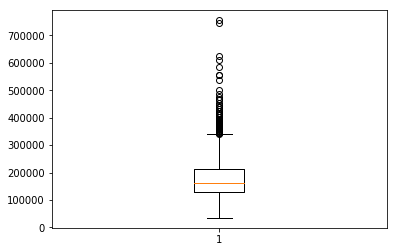

In [143]:
plt.boxplot(train['SalePrice'])

# there are some outliers here i guess

In [144]:
numeric_features = train.select_dtypes(exclude=object)

In [145]:
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

cat_features are the categorical features

In [146]:
cat_features = train.drop(numeric_features.columns, axis=1)

In [147]:
cat_features.shape

(1460, 43)

In [148]:
numeric_features.shape

(1460, 38)

In [149]:
numeric_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


* Lets do EDA of the numeric features

In [150]:
#Dropping the column ID
numeric_features.drop('Id', inplace=True, axis= 1)

C:\Users\Shrirang\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [151]:
numeric_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


Lets work with missing Data

In [152]:
numeric_features.isnull().any()

MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [153]:
['GarageYrBlt','MasVnrArea','LotFrontage']

['GarageYrBlt', 'MasVnrArea', 'LotFrontage']

There is no null values in the numeric features

Lets See the Realtion between the variables

In [154]:
for i in numeric_features.columns:
    print(numeric_features[i].nunique())

15
110
1073
10
9
112
61
327
637
144
780
721
753
417
24
861
4
3
4
3
8
4
12
4
97
5
441
274
202
120
20
76
8
21
12
5
663


> So there are some descrite values

lets see wich are the discrete variable, we will apply the criteria of 15, i,e, 
The variable which has less than 15 diffrent values we will consider them as a discrete variables

In [155]:
discrete_var = []
for i in numeric_features.columns:
    if numeric_features[i].nunique()<= 15:
        print("{}  has the \n{}".format(i,numeric_features[i].value_counts()))

MSSubClass  has the 
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
OverallQual  has the 
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
OverallCond  has the 
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
BsmtFullBath  has the 
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
BsmtHalfBath  has the 
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
FullBath  has the 
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
HalfBath  has the 
0    913
1    535
2     12
Name: HalfBath, dtype: int64
BedroomAbvGr  has the 
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
KitchenAbvGr  has the 
1    1

In [156]:
# we will drop PoolArea as most of the values are zero


In [157]:
numeric_features.shape


(1460, 37)

In [158]:

numeric_features.corr()['SalePrice'].sort_values(ascending=True)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

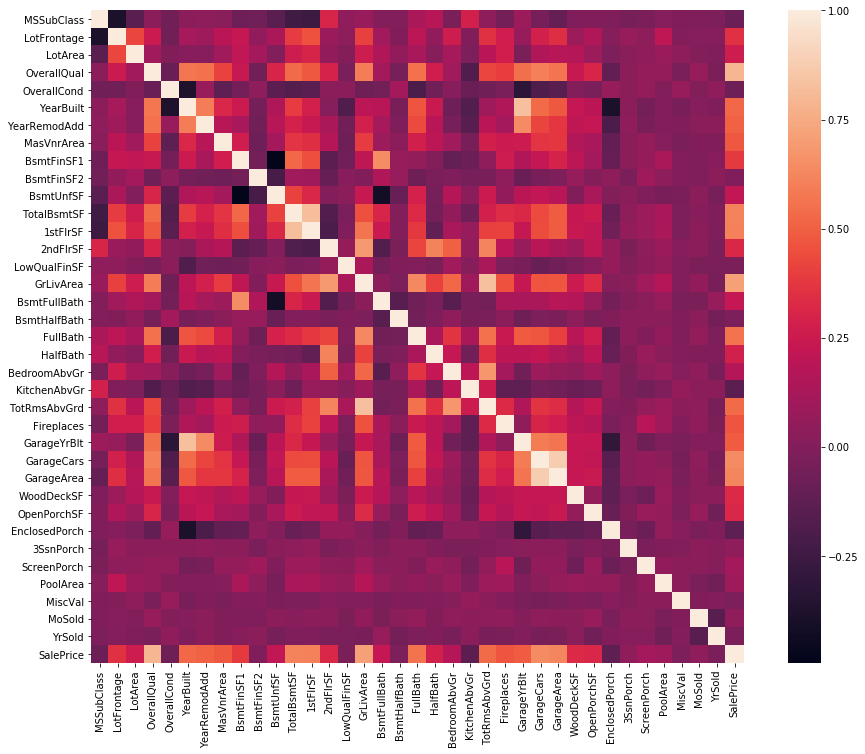

In [159]:
f, ax =plt.subplots(figsize = (16,12))
sns.heatmap(numeric_features.corr(), vmax = 1, square = True)

In [160]:
numeric_features[['GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']].corr()

,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,SalePrice
GarageCars,1.000000,0.882475,0.434585,0.439317,0.640409
GarageArea,0.882475,1.000000,0.486665,0.489782,0.623431
TotalBsmtSF,0.434585,0.486665,1.000000,0.819530,0.613581
1stFlrSF,0.439317,0.489782,0.819530,1.000000,0.605852
SalePrice,0.640409,0.623431,0.613581,0.605852,1.000000


GarageCars is more correlated to target compaired to Garage Area so we will drop GarageArea, same for 1stFlrSF


In [161]:
# Lets see correlation one more time , Here will emphasis on the variables which are more corelated to target columns and we will do 
#

In [162]:
highcorr_numfr = list(numeric_features.corr()['SalePrice'].sort_values(ascending = False)[0:10].index.drop(['GarageArea','1stFlrSF']))

In [163]:
highcorr_numfr

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [164]:

#sns.pairplot(numeric_features[highcorr_numfr])

I fill like ther are some outliers in SalePrice, GrLivArea, TotalBsmtSF, Lets dive into that

In [165]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sale_norm = ss.fit_transform(numeric_features['SalePrice'].values.reshape(-1,1))

C:\Users\Shrirang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Shrirang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [166]:
sale_norm[sale_norm.reshape(1,-1).argsort()][0][0:5]

array([[-1.83870376],
       [-1.83352844],
       [-1.80092766],
       [-1.78329881],
       [-1.77448439]])

In [167]:
sale_norm[sale_norm.reshape(1,-1).argsort()][0][-5:]

array([[5.06214602],
       [5.42383959],
       [5.59185509],
       [7.10289909],
       [7.22881942]])

There is outlier at highend but right now lets egnore them

In [168]:
# For GrLivArea, TotalBsmtSF, we have to chek with SalePrice

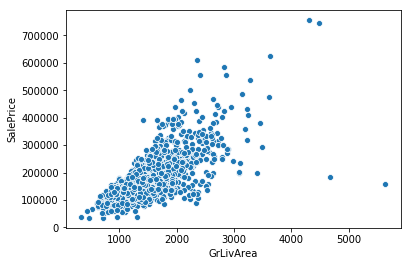

In [169]:
#f, ax = plt.figure(figsize=(16,12))
sns.scatterplot(numeric_features['GrLivArea'], numeric_features['SalePrice'])

There is outlier in GrLivArea, Lets get there locations

In [170]:
numeric_features.drop(numeric_features['GrLivArea'].argsort()[-2:], inplace=True)

C:\Users\Shrirang\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [171]:
numeric_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


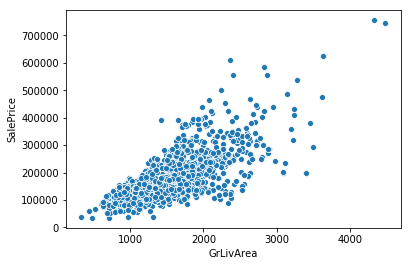

In [172]:
# Lets plot again and see ouliers are gone or not 
sns.scatterplot(numeric_features['GrLivArea'], numeric_features['SalePrice'])

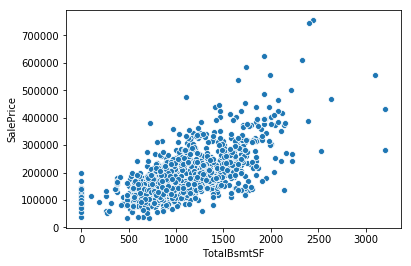

In [173]:
# Lets look the outlier of Total BsmtSF
sns.scatterplot(numeric_features['TotalBsmtSF'], numeric_features['SalePrice'])

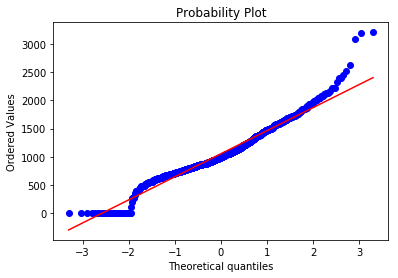

In [174]:
figure = plt.figure()
fig = stats.probplot(numeric_features['TotalBsmtSF'], plot = plt)
plt.show()

# 2 Lets look at the Categorical features


In [175]:
# I will delete the two data row which are outliers in 'GrLivAres', from data which will be used for categorical data analysis
train.drop(numeric_features['GrLivArea'].argsort()[-2:], inplace=True)

In [176]:
cat_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [177]:
# Lets get the categorical data from train data set
cat_features = train[cat_features.columns]

In [178]:
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1458 non-null object
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1450 non-null object
ExterQual        1458 non-null object
ExterCond        1458 non-null object
Foundation       1458 non-null object
BsmtQual         1421 non-null object
BsmtCond         1421 non-null object
BsmtExposure     1420

We can find two important inferences from above
* 1 it doesn't contain any numeric features (except target)
* 2 There are null values present 

In [179]:

# Lets see null how many percent is the null values of the data
null_percent =(cat_features.isnull().sum()/cat_features.isnull().count()).sort_values(ascending= False)*100



In [180]:
null_percent.index[:14]

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond'],
      dtype='object')

* PoolQC, MiscFeature, Alley, Fence has more than 75% null values in there columns, So we can ingore them
FireplaceQU is column represeting firelace quality but lots of houses are't have fire place, So in my openion it is better to drop it
* Also, GarageCond, GarageQual...... and BsmtFinType2.... Also have null values for the same data row, where the Basement and garage is not availabe in the house or we don't have data for same, But we already have numeric features for the Basemanr and Garage,
We will drop them also for now...(we will chek definetly come here if we require )
* So take away from here is **DROP 
            ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond']**

In [181]:
cat_features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond'], axis=1,inplace=True)

C:\Users\Shrirang\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [182]:
cat_features.isnull().sum().sort_values()

MSZoning         0
PavedDrive       0
Functional       0
KitchenQual      0
CentralAir       0
HeatingQC        0
Heating          0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
SaleType         0
RoofMatl         0
Exterior1st      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
RoofStyle        0
SaleCondition    0
Electrical       1
MasVnrType       8
dtype: int64

In [183]:
# There are now two cloumns which contains the null values and less than 9 row, So wildrop those row
cat_features.dropna(axis=0, inplace=True)

C:\Users\Shrirang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Now its time to check the categories and there trend**

In [184]:
# Lets calculate the number unique of categories predent inside each column
n_unique = {}
for i in cat_features.columns:
    n_unique[i] = cat_features[i].nunique()

In [185]:
n_unique

{'MSZoning': 5,
 'Street': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 4,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 7,
 'PavedDrive': 3,
 'SaleType': 9,
 'SaleCondition': 6}

In [186]:
cat_features['MSZoning'].value_counts()[:3]

RL    1145
RM     216
FV      62
Name: MSZoning, dtype: int64

Now we will see the top three categories by number of there instances presented  

In [187]:
d = {}
for i in cat_features.columns:
    d[i] =cat_features[i].value_counts()[:3]
    

In [188]:
d

{'MSZoning': RL    1145
 RM     216
 FV      62
 Name: MSZoning, dtype: int64, 'Street': Pave    1443
 Grvl       6
 Name: Street, dtype: int64, 'LotShape': Reg    917
 IR1    481
 IR2     41
 Name: LotShape, dtype: int64, 'LandContour': Lvl    1301
 Bnk      63
 HLS      49
 Name: LandContour, dtype: int64, 'Utilities': AllPub    1448
 NoSeWa       1
 Name: Utilities, dtype: int64, 'LotConfig': Inside     1043
 Corner      262
 CulDSac      93
 Name: LotConfig, dtype: int64, 'LandSlope': Gtl    1372
 Mod      64
 Sev      13
 Name: LandSlope, dtype: int64, 'Neighborhood': NAmes      225
 CollgCr    148
 OldTown    113
 Name: Neighborhood, dtype: int64, 'Condition1': Norm      1249
 Feedr       81
 Artery      48
 Name: Condition1, dtype: int64, 'Condition2': Norm     1434
 Feedr       6
 RRNn        2
 Name: Condition2, dtype: int64, 'BldgType': 1Fam      1212
 TwnhsE     111
 Duplex      52
 Name: BldgType, dtype: int64, 'HouseStyle': 1Story    719
 2Story    442
 1.5Fin    154
 Name

* To deal with categorical features we have two option 1- Ordinal Encoder, 2- OneHotEncoder
* Thise are two class methodes from sklearn.preprocessing
1. Ordeinal Encoder is for the categoeries like [worst, bad, good, excelent]
2. OneHotEncoder will create new colummns with each features and put 1 or 0 if corresponding feature is present on not for the given instance.



In [189]:
for i in ['ExterQual','ExterCond','HeatingQC','KitchenQual']:
    print(cat_features[i].value_counts())

TA    905
Gd    480
Ex     50
Fa     14
Name: ExterQual, dtype: int64
TA    1271
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Ex    732
TA    427
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64
TA    734
Gd    577
Ex     99
Fa     39
Name: KitchenQual, dtype: int64


In [190]:
cat_features[['ExterQual','ExterCond','HeatingQC','KitchenQual']]


,ExterQual,ExterCond,HeatingQC,KitchenQual
0,Gd,TA,Ex,Gd
1,TA,TA,Ex,TA
2,Gd,TA,Ex,Gd
3,TA,TA,Gd,Gd
4,Gd,TA,Ex,Gd
5,TA,TA,Ex,TA
6,Gd,TA,Ex,Gd
7,TA,TA,Ex,TA
8,TA,TA,Gd,TA
9,TA,TA,Ex,TA


This four feature (ExterQual,ExterCond,HeatingQC,KitchenQual) contains the five catogaries as followes
 
 Ex = Excellent , Gd = Good, TA = Typical/Average, Fa = Fair, PO = Poor
 This kind of fratures we can transform into Ordinal Encoding

In [191]:
def encoder(x):
    if x == 'Ex':
        return 4
    elif x == 'Gd':
        return 3
    elif x == 'TA':
        return 2
    elif x == 'Fa':
        return 1
    elif x == 'PO' or x == 'Po':
        return 0
    else:
        return x

In [192]:
# We have done lable encoder manually on the columns
for i in ['ExterQual','ExterCond','HeatingQC','KitchenQual']:
    cat_features[i] = cat_features[i].map(encoder)

C:\Users\Shrirang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now we have delt with ExterQual,ExterCond,HeatingQC,KitchenQual Which depict the quality 
There two more features CentralAir and PavedDrive


In [193]:
# We have converted this 'Y' and 'N' into 1 and 0
cat_features['CentralAir'] =cat_features['CentralAir'].map(lambda x: 1 if x=='Y'else 0)

C:\Users\Shrirang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [194]:
# Now deal with Paved Drive which has three categories
def ypn(x):
    if x=='Y':
        return 2
    elif x == 'P':
        return 1
    elif x == 'N':
        return 0
    else:
        return x

In [195]:
cat_features['PavedDrive'] = cat_features['PavedDrive'].map(ypn)

C:\Users\Shrirang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [196]:
cat_features[['ExterQual','ExterCond','HeatingQC','KitchenQual','PavedDrive','CentralAir']]

,ExterQual,ExterCond,HeatingQC,KitchenQual,PavedDrive,CentralAir
0,3,2,4,3,2,1
1,2,2,4,2,2,1
2,3,2,4,3,2,1
3,2,2,3,3,2,1
4,3,2,4,3,2,1
5,2,2,4,2,2,1
6,3,2,4,3,2,1
7,2,2,4,2,2,1
8,2,2,3,2,2,1
9,2,2,4,2,2,1


Now lets deal with remaining categorical features, We will do OneHotEncoding

In [197]:
# First get the coulmn name which are remained to preprocess
remaining = cat_features.columns.drop(['ExterQual','ExterCond','HeatingQC','KitchenQual','PavedDrive','CentralAir'])

In [198]:
remaining

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'SaleType', 'SaleCondition'],
      dtype='object')

In [199]:
dummies = pd.get_dummies(cat_features[remaining])

In [200]:
dummies

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [201]:
# We will join the cat_features and dummies
cat_features = cat_features.join(other = dummies)

In [202]:
# Lets drop the columns , from which we have got the dummies i.e. remaining
cat_features.drop(remaining, inplace= True, axis=1)

In [203]:
numeric_features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


In [204]:
cat_features

,ExterQual,ExterCond,HeatingQC,CentralAir,KitchenQual,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,2,4,1,3,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,2,2,4,1,2,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,3,2,4,1,3,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,2,2,3,1,3,2,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,3,2,4,1,3,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
5,2,2,4,1,2,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6,3,2,4,1,3,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
7,2,2,4,1,2,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8,2,2,3,1,2,2,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,2,2,4,1,2,2,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


As we see the shape of the numeric and categorical features , There are difference , we havn't deleted the rows where catfeatures have null values, So we will do here inner join (Nice idea right)

In [205]:
final_train =cat_features.join(other = numeric_features, on = cat_features.index, how= 'inner')

In [206]:
final_train.fillna

<bound method DataFrame.fillna of       key_0  ExterQual  ExterCond  HeatingQC  CentralAir  KitchenQual  \
0         0          3          2          4           1            3   
1         1          2          2          4           1            2   
2         2          3          2          4           1            3   
3         3          2          2          3           1            3   
4         4          3          2          4           1            3   
5         5          2          2          4           1            2   
6         6          3          2          4           1            3   
7         7          2          2          4           1            2   
8         8          2          2          3           1            2   
9         9          2          2          4           1            2   
10       10          2          2          4           1            2   
11       11          4          2          4           1            4   
12       12      

In [207]:
# Still there are some null values in LotFrontage,GarageYrBlt, Which we havenot checked in numerica feature exploration, mistake happend, Lets correct now
final_train['LotFrontage']=final_train['LotFrontage'].fillna(final_train['LotFrontage'].median())

In [208]:
final_train['GarageYrBlt'] = final_train['GarageYrBlt'].fillna(final_train['GarageYrBlt'].median())

In [209]:
final_train[['GarageYrBlt','MasVnrArea','LotFrontage']].isna().sum()

GarageYrBlt    0
MasVnrArea     0
LotFrontage    0
dtype: int64

In [210]:
final_train

,key_0,ExterQual,ExterCond,HeatingQC,CentralAir,KitchenQual,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,3,2,4,1,3,2,0,0,0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,2,4,1,2,2,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,2,4,1,3,2,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,2,2,3,1,3,2,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,3,2,4,1,3,2,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000
5,5,2,2,4,1,2,2,0,0,0,...,40,30,0,320,0,0,700,10,2009,143000
6,6,3,2,4,1,3,2,0,0,0,...,255,57,0,0,0,0,0,8,2007,307000
7,7,2,2,4,1,2,2,0,0,0,...,235,204,228,0,0,0,350,11,2009,200000
8,8,2,2,3,1,2,2,0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,9,2,2,4,1,2,2,0,0,0,...,0,4,0,0,0,0,0,1,2008,118000


We have do all the transformation on test set also, Lets do it.


In [211]:
test.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond'], axis=1,inplace=True)

In [212]:
test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtFinSF1         1
BsmtFinSF2         1
                ... 
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Functional         2
Fireplaces         0
GarageYrBlt       78
GarageCars   

In [213]:
train['MSZoning'].value_counts()

RL         1151
RM          216
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [214]:
test['MSZoning'] = test['MSZoning'].fillna('RL')
# Filling the 'RL' value in missing place , RL is most common

In [215]:
train['LotArea'].median()

9485.0

In [216]:
train1 = train.copy()

In [217]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [218]:
#remove outliers
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

In [219]:
#train1 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#test1 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train1 = pd.read_csv('train.csv')
test1 = pd.read_csv('test.csv')

In [220]:
#remove outliers
train1.drop(train1[(train1['OverallQual']<5) & (train1['SalePrice']>200000)].index, inplace=True)
train1.drop(train1[(train1['GrLivArea']>4500) & (train1['SalePrice']<300000)].index, inplace=True)
train1.reset_index(drop=True, inplace=True)

In [221]:
train_labels = train1['SalePrice']

In [222]:
full_features = pd.concat((train1,test1))
full_features.drop('SalePrice', axis=1, inplace=True)

C:\Users\Shrirang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [223]:
full_features.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond'], axis=1,inplace=True)

In [224]:
for i in ['ExterQual','ExterCond','HeatingQC','KitchenQual']:
    full_features[i] = full_features[i].map(encoder)

In [225]:
full_features['CentralAir'] = full_features['CentralAir'].map(lambda x: 1 if x=='Y'else 0)

In [226]:
full_features['PavedDrive'] = full_features['PavedDrive'].map(ypn)

In [227]:
full_features.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
BedroomAbvGr       0
BldgType           0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
CentralAir         0
Condition1         0
Condition2         0
Electrical         1
EnclosedPorch      0
ExterCond          0
ExterQual          0
Exterior1st        1
Exterior2nd        1
Fireplaces         0
Foundation         0
FullBath           0
Functional         2
GarageArea         1
GarageCars         1
GarageYrBlt      159
GrLivArea          0
HalfBath           0
Heating            0
HeatingQC          0
                ... 
LotArea            0
LotConfig          0
LotFrontage      485
LotShape           0
LowQualFinSF       0
MSSubClass         0
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscVal            0
MoSold             0
Neighborhood       0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PavedDrive         0
PoolArea     

In [228]:
full_features[numeric_features.columns.drop('SalePrice')].isnull().sum()

MSSubClass         0
LotFrontage      485
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [229]:
numeric_features.columns.drop('SalePrice')

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [230]:
full_features[numeric_features.columns.drop('SalePrice')].isnull().sum()

MSSubClass         0
LotFrontage      485
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [231]:
for i in numeric_features.columns.drop('SalePrice'):
    full_features[i] = full_features[i].fillna(train[i].median())

In [232]:
full_features['SaleType'].value_counts()

WD       2524
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [233]:
full_features.isna().sum()

1stFlrSF          0
2ndFlrSF          0
3SsnPorch         0
BedroomAbvGr      0
BldgType          0
BsmtFinSF1        0
BsmtFinSF2        0
BsmtFullBath      0
BsmtHalfBath      0
BsmtUnfSF         0
CentralAir        0
Condition1        0
Condition2        0
Electrical        1
EnclosedPorch     0
ExterCond         0
ExterQual         0
Exterior1st       1
Exterior2nd       1
Fireplaces        0
Foundation        0
FullBath          0
Functional        2
GarageArea        0
GarageCars        0
GarageYrBlt       0
GrLivArea         0
HalfBath          0
Heating           0
HeatingQC         0
                 ..
LotArea           0
LotConfig         0
LotFrontage       0
LotShape          0
LowQualFinSF      0
MSSubClass        0
MSZoning          4
MasVnrArea        0
MasVnrType       24
MiscVal           0
MoSold            0
Neighborhood      0
OpenPorchSF       0
OverallCond       0
OverallQual       0
PavedDrive        0
PoolArea          0
RoofMatl          0
RoofStyle         0


In [234]:
full_features['MSZoning'].isna().sum()

4

In [235]:
full_features['MSZoning'].value_counts().index[0]

'RL'

In [236]:
full_features['MSZoning'].fillna(full_features['MSZoning'].value_counts().index[0]).isna().sum()

0

In [237]:
for i in full_features.columns:
    full_features[i]=full_features[i].fillna(full_features[i].value_counts().index[0])

In [238]:
full_features = pd.get_dummies(full_features).reset_index(drop = True)

In [239]:
full_features.drop('Id',axis = 1, inplace=True)

In [240]:
train2 = full_features.iloc[:len(train1),:]

In [241]:
train2['SalePrice'] = train1['SalePrice']

C:\Users\Shrirang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
test2 = full_features.iloc[len(train1):,:]

In [243]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV, train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error


C:\Users\Shrirang\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Lets check the data with in itself, for that i will split the train data into two parts to check the score

In [244]:
X = train2.drop('SalePrice', axis=1)
y = train2['SalePrice']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
r_scale = RobustScaler().fit(X_train)
X_train_scale = r_scale.transform(X_train)
X_test_scale = r_scale.transform(X_test)
lr = LinearRegression().fit(X_train_scale, y_train)
y_pred = lr.predict(X_test_scale)
mean_squared_error(y_test, y_pred)

701520397.85988

This Linear model has given me 0.69 score on test set, which is not enough good, So I would check different model

In [246]:
# I will use cross_validation, of the 10 folds 
kfold = KFold(n_splits = 10, random_state=42, shuffle=True)

In [247]:
tree_reg = RandomForestRegressor()

In [248]:
#parameters for the Grid Search CV
para = {'n_estimators':[700,500,200],'max_depth':[50,80]}


In [249]:
forest_reg = GridSearchCV(tree_reg, param_grid=para, cv= kfold)

In [250]:
forest_reg.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [700, 500, 200], 'max_depth': [50, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [251]:
forest_reg.best_params_

{'max_depth': 50, 'n_estimators': 200}

In [252]:
forest_reg.best_score_

0.891187116011009

In [253]:
y_pred2 = forest_reg.predict(test2)

In [254]:
output = pd.DataFrame({'Id':test1['Id'],'SalePrice':y_pred2})

In [255]:
output.to_csv('random_forest_solution', index= False)